# Python Sensitivity Analysis
$R0=\frac{\sigma}{\sigma+\mu} \times \frac {\beta}{\alpha+\mu+\gamma}\\ $  from Bjornstad   
$ \beta = c_r \times  \epsilon \times  \frac{\frac{-1}{q}(1-e^{qd})}{\frac{-1}{q}(1-e^{qd})+h}\\ $ - from my definition  
$ \alpha= \frac{p}{1-p}(\mu + \gamma) $ to convert into fatality rate  
$\alpha+\mu+\gamma = \frac{p}{1-p}(\mu + \gamma)+\mu+\gamma $  
$\alpha+\mu+\gamma = (\frac{p}{1-p}+1)(\mu + \gamma) $  
$\alpha+\mu+\gamma = (\frac{1}{1-p})(\mu + \gamma) $  

$ R0= \frac{\sigma}{\sigma + \mu}  \times \frac{ c_r \times \epsilon \times  \frac{ \frac{-1 }{ q} \times (1 - e^{ q  d})}{\frac{- 1}{q} \times (1 - e^{ q d}) + h} }{(\mu + \gamma)\frac{1}{1 - p}}$

In [15]:
import numpy as np
import sympy
from sympy import *
import matplotlib.pylab as plot
import matplotlib.pyplot as plt


In [82]:
no_range=100
def diff_func(equation,variable,parms):
    """finds partial derivative divided by equation (R0) for particular variable"""
    dR0dv=diff(equation,variable)
    dR0dv_proportion=dR0dv/equation
    for i in dR0dv_proportion.free_symbols: 
        dR0dv_proportion=dR0dv_proportion.subs(i,parms[str(i)])
    return(dR0dv_proportion)

def loop_diff(parms,equation,abs_req):
    """loop through parameters in equation(R0), call diff_func and store importance of each parameter"""
    importance_dictionary={}
    for k in equation.free_symbols:
        if abs_req==True:
            importance_dictionary[str(k)]=abs(diff_func(equation,k,parms))
        else:
            importance_dictionary[str(k)]=diff_func(equation,k,parms)
    return(importance_dictionary)

def plot_parm_imp(parms,equation,abs_req):
    """plot for one set of variables"""
    rank=loop_diff(parms,equation,abs_req)
    #sorted(rank, key=rank.get,reverse=True)
    #f1=plot.figure()
    variable= [i for i in rank]
    value=[rank[str(i)] for i in rank]
    plot.bar(variable,height=value,width=0.8)
    #return(sum(abs_value))
    #plot.show()

#def loop_diff_varying_parameters(parms_min,parms_median,parms_max,equation,abs_req):
#    """repeat loop_diff for a range of parameters and keep output"""
 #   rank_dict={}
  #  parms_temp=parms_median
   # for k in equation.free_symbols:
       # print(equation)
    #    rank_dict[str(k)]={}
     #   param_value_range=np.linspace(parms_min[str(k)],parms_max[str(k)],4)
      #  for l in param_value_range:
       #     parms_temp[str(k)]=l
        #    rank_dict[str(k)][l]=loop_diff(parms_temp,equation,abs_req)
   # return(rank_dict)


def varying_parameters(parms_min,parms_median,parms_max,equation,abs_req):
    """repeat loop_diff for a range of parameters and keep output"""
    rank_list=[]
    parms_temp=parms_median
    for k in equation.free_symbols:
       # if k!=c_r:
        # if k!=q:
        param_value_range=np.linspace(parms_min[str(k)],parms_max[str(k)],no_range)
        for l in param_value_range:
            parms_temp[str(k)]=l
            rank_list.append([k,l,loop_diff(parms_temp,equation,abs_req)])
    return(rank_list)

def varying_parameters_ranks(parms_min,parms_median,parms_max,equation):
    """repeat loop_diff for a range of parameters and keep output- ranks """
    rank_list=[]
    parms_temp=parms_median
    for k in equation.free_symbols:
     #   if k!=c_r:
       #     if k!=q:
        param_value_range=np.linspace(parms_min[str(k)],parms_max[str(k)],no_range)
        for l in param_value_range:
            parms_temp[str(k)]=l
            argh=loop_diff(parms_temp,equation,abs_req=True)
            argh={key: rank for rank, key in enumerate(sorted(argh, key=argh.get, reverse=False), 1)}
            rank_list.append([k,l,argh])
    return(rank_list)


def plot_value_ranges(a):
    """plots the mean and standard error of dR0/dt based on the results of the sensitivity analysis"""
    value_dics=[i[2] for i in a] #just values 
    parameters=[i for i in value_dics[0]] # just parameters
    parameters.sort()
    #arameters_short=parameters[:]
    #arameters_short.remove("q")
    #arameters_short.remove("c_r")

    #ust_values=[value_dics[l][s] for s in parameters for l in range(len(parameters_short*no_range))] #all possible values
    just_values=[value_dics[l][s] for s in parameters for l in range(len(parameters*no_range))] #all possible values
    parameters=np.array(parameters)
    no_parameters=len(parameters)
    no_each_parameter=len(just_values)/no_parameters
    no_each_parameter=int(no_each_parameter)
    array_values=np.array(just_values)    
    to_fill = np.reshape(just_values, (no_parameters,no_each_parameter))
    m=np.matrix(to_fill,dtype=np.float64)
    means=np.array(m.mean(1))
    errors=np.array(m.std(1))
    array_means=np.repeat(means,no_each_parameter)
    array_parameters=np.repeat(parameters, no_each_parameter)
    array_errors=np.repeat(a=errors,repeats=no_each_parameter)
    plot.bar(array_parameters,array_means,yerr=array_errors)
    plot.xlabel("Parameter")
    
def plot_hist(a):
    """plots the histograms of dR0/dt based on the results of the sensitivity analysis"""

    value_dics=[i[2] for i in a] #just values 
    parameters=[i for i in value_dics[0]] # just parameters
    parameters.sort()
    #parameters_short=parameters[:]
    #parameters_short.remove("q")
   # parameters_short.remove("c_r")

    #just_values=[value_dics[l][s] for s in parameters for l in range(len(parameters_short*no_range))] #all possible values
    just_values=[value_dics[l][k] for k in parameters for l in range(len(parameters*no_range))] #all possible values
    #parameters=np.array(parameters)
    no_parameters=len(parameters)
    no_each_parameter=len(just_values)/no_parameters
    no_each_parameter=int(no_each_parameter)
    to_fill = np.reshape(just_values, (no_each_parameter,no_parameters),order="f")
    #array_values=np.array(just_values) 
    #array_parameters=np.repeat(parameters, no_each_parameter)
    colours=["indigo","cyan","teal","green","olive","moccasin","palevioletred","mediumpurple","purple"]
    bins_list=[1,2,3,4,5,6,7,8,9,10]
    plot.hist(to_fill, bins=bins_list, histtype="bar", label=parameters,color=colours,align='left')
    plot.legend(loc='upper right')
    plot.xticks(np.arange(1,9, ))
    plot.xlabel('rank')
    plot.ylabel('frequency')

In [68]:

sigma, mu, c_r, epsilon, d, h, gamma, p = var('sigma, mu, c_r, epsilon, d, h, gamma, p ',real=True, positive = true)
q = var('q',real=True, positive = False)
R0 = (sigma / (sigma + mu)) * c_r * epsilon *  (( (-1 / q) * (1 - exp( q * d)))/((- 1 / q) * (1 - exp( q * d)) + h)) / ((mu + gamma)*( 1 / ( 1 - p )))



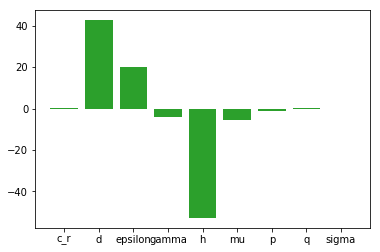

In [65]:
plot_parm_imp(parms ={"sigma": 0.68, "mu": 2.06e-5, "c_r": 18.54 , "epsilon": 0.05, "d": 4/24, "h": 0.25/24, "gamma": 0.25, "p": 0.005, "q":-39.87 },equation=R0,abs_req=False)
plot_parm_imp(parms ={"sigma": 0.68, "mu": 2.06e-5, "c_r": 18.54 , "epsilon": 0.1, "d": 4/24, "h": 0.25/24, "gamma": 0.25, "p": 0.005, "q":-39.87 }
,equation=R0,abs_req=False)
plot_parm_imp(parms ={"sigma": 0.68, "mu": 2.06e-5, "c_r": 18.54 , "epsilon": 0.05, "d": 0.25/24, "h": 0.25/24, "gamma": 0.25, "p": 0.005, "q":-39.87 }
,equation=R0,abs_req=False)

In [66]:
#medium temp
parms_median ={"sigma": 0.68 , "mu": 2.06e-5, "c_r": 18.54 , "epsilon": 0.05, "d": 4/24, "h": 0.25/24, "gamma": 0.25, "p": 0.005, "q":-39.87 }
parms_min ={"sigma": 0.4, "mu": 1e-5, "c_r": 18.54 , "epsilon": 0.01, "d": 0.25/24, "h": 1/60/24, "gamma": 0.1, "p": 0.001, "q":-39.87}
parms_max ={"sigma": 0.96, "mu":5e-5, "c_r": 18.54 , "epsilon": 0.2, "d": 4/24, "h": 4/24, "gamma": 0.5, "p": 0.01, "q":-39.87 }
a1=varying_parameters(parms_min,parms_median,parms_max,R0,abs_req=False)
a2=varying_parameters_ranks(parms_min,parms_median,parms_max,R0)
#high temp
parms_median ={"sigma": 0.68, "mu": 2.06e-5, "c_r": 30 , "epsilon": 0.05, "d": 4/24, "h": 0.25/24, "gamma": 0.25, "p": 0.005, "q":-73 }
parms_min ={"sigma": 0.4, "mu": 1e-5, "c_r": 30 , "epsilon": 0.01, "d": 0.25/24, "h": 1/60/24, "gamma": 0.1, "p": 0.001, "q":-73}
parms_max ={"sigma": 0.96, "mu":5e-5, "c_r": 30 , "epsilon": 0.2, "d": 4/24, "h": 4/24, "gamma": 0.5, "p": 0.01, "q":-73 }
b1=varying_parameters(parms_min,parms_median,parms_max,R0,abs_req=False)
b2=varying_parameters_ranks(parms_min,parms_median,parms_max,R0)
#low temp
parms_median ={"sigma": 0.68, "mu": 2.06e-5, "c_r": 4.3 , "epsilon": 0.05, "d": 4/24, "h": 0.25/24, "gamma": 0.25, "p": 0.005, "q":-21 }
parms_min ={"sigma": 0.4, "mu": 1e-5, "c_r": 4.3 , "epsilon": 0.01, "d": 0.25/24, "h": 1/60/24, "gamma": 0.1, "p": 0.001, "q":-21 }
parms_max ={"sigma": 0.96, "mu":5e-5, "c_r": 4.3 , "epsilon": 0.2, "d": 4/24, "h": 4/24, "gamma": 0.5, "p": 0.01, "q":-21 }
c1=varying_parameters(parms_min,parms_median,parms_max,R0,abs_req=False)
c2=varying_parameters_ranks(parms_min,parms_median,parms_max,R0)

KeyboardInterrupt: 

In [83]:
##sensitivity analysis- set variance
#medium temp
parms_median ={"sigma": 0.68 , "mu": 2.06e-5, "c_r": 18.54 , "epsilon": 0.05, "d": 4/24, "h": 0.25/24, "gamma": 0.25, "p": 0.005, "q":-39.87 }
parms_max ={"sigma": parms_median["sigma"]*1.5, "mu": parms_median["mu"]*1.5, "c_r": parms_median["c_r"] , "epsilon": parms_median["epsilon"]*1.5, "d": parms_median["d"]*1.5, "h": parms_median["h"]*1.5, "gamma": parms_median["gamma"]*1.5, "p": parms_median["p"]*1.5, "q":parms_median["q"]}
parms_min ={"sigma": parms_median["sigma"]*0.5, "mu": parms_median["mu"]*0.5, "c_r": parms_median["c_r"] , "epsilon": parms_median["epsilon"]*0.5, "d": parms_median["d"]*0.5, "h": parms_median["h"]*0.5, "gamma": parms_median["gamma"]*0.5, "p": parms_median["p"]*0.5, "q":parms_median["q"]}

a1=varying_parameters(parms_min,parms_median,parms_max,R0,abs_req=False)
a2=varying_parameters_ranks(parms_min,parms_median,parms_max,R0)
#high temp
parms_median ={"sigma": 0.68, "mu": 2.06e-5, "c_r": 30 , "epsilon": 0.05, "d": 4/24, "h": 0.25/24, "gamma": 0.25, "p": 0.005, "q":-73 }
parms_max ={"sigma": parms_median["sigma"]*1.5, "mu": parms_median["mu"]*1.5, "c_r": parms_median["c_r"] , "epsilon": parms_median["epsilon"]*1.5, "d": parms_median["d"]*1.5, "h": parms_median["h"]*1.5, "gamma": parms_median["gamma"]*1.5, "p": parms_median["p"]*1.5, "q":parms_median["q"]}
parms_min ={"sigma": parms_median["sigma"]*0.5, "mu": parms_median["mu"]*0.5, "c_r": parms_median["c_r"] , "epsilon": parms_median["epsilon"]*0.5, "d": parms_median["d"]*0.5, "h": parms_median["h"]*0.5, "gamma": parms_median["gamma"]*0.5, "p": parms_median["p"]*0.5, "q":parms_median["q"]}
b1=varying_parameters(parms_min,parms_median,parms_max,R0,abs_req=False)
b2=varying_parameters_ranks(parms_min,parms_median,parms_max,R0)
#low temp
parms_median ={"sigma": 0.68, "mu": 2.06e-5, "c_r": 4.3 , "epsilon": 0.05, "d": 4/24, "h": 0.25/24, "gamma": 0.25, "p": 0.005, "q":-21 }
parms_max ={"sigma": parms_median["sigma"]*1.5, "mu": parms_median["mu"]*1.5, "c_r": parms_median["c_r"] , "epsilon": parms_median["epsilon"]*1.5, "d": parms_median["d"]*1.5, "h": parms_median["h"]*1.5, "gamma": parms_median["gamma"]*1.5, "p": parms_median["p"]*1.5, "q":parms_median["q"]}
parms_min ={"sigma": parms_median["sigma"]*0.5, "mu": parms_median["mu"]*0.5, "c_r": parms_median["c_r"] , "epsilon": parms_median["epsilon"]*0.5, "d": parms_median["d"]*0.5, "h": parms_median["h"]*0.5, "gamma": parms_median["gamma"]*0.5, "p": parms_median["p"]*0.5, "q":parms_median["q"]}

c1=varying_parameters(parms_min,parms_median,parms_max,R0,abs_req=False)
c2=varying_parameters_ranks(parms_min,parms_median,parms_max,R0)


In [69]:
#medium temp
parms_median ={"sigma": 0.68 , "mu": 2.06e-5, "c_r": 18.54 , "epsilon": 0.05, "d": 4/24, "h": 0.25/24, "gamma": 0.25, "p": 0.005, "q":-39.87 }
parms_max ={"sigma": parms_median["sigma"]*1.5, "mu": parms_median["mu"]*1.5, "c_r": parms_median["c_r"]*1.5 , "epsilon": parms_median["epsilon"]*1.5, "d": parms_median["d"]*1.5, "h": parms_median["h"]*1.5, "gamma": parms_median["gamma"]*1.5, "p": parms_median["p"]*1.5, "q":parms_median["q"]*1.5}
parms_min ={"sigma": parms_median["sigma"]*0.5, "mu": parms_median["mu"]*0.5, "c_r": parms_median["c_r"]*0.5 , "epsilon": parms_median["epsilon"]*0.5, "d": parms_median["d"]*0.5, "h": parms_median["h"]*0.5, "gamma": parms_median["gamma"]*0.5, "p": parms_median["p"]*0.5, "q":parms_median["q"]*0.5}

a1=varying_parameters(parms_min,parms_median,parms_max,R0,abs_req=False)
a2=varying_parameters_ranks(parms_min,parms_median,parms_max,R0)

In [81]:
a1

[[gamma,
  0.125,
  {'gamma': -7.99868181723652,
   'epsilon': 20.0000000000000,
   'h': -28.1963662524536,
   'mu': -9.46922550370719,
   'q': 0.00730300021316193,
   'p': -1.00502512562814,
   'c_r': 0.0539374325782093,
   'd': 0.0152491797857534,
   'sigma': 4.45488234433049e-5}],
 [gamma,
  0.15277777777777779,
  {'gamma': -6.54457209915114,
   'epsilon': 20.0000000000000,
   'h': -28.1963662524536,
   'mu': -8.01511578562182,
   'q': 0.00730300021316193,
   'p': -1.00502512562814,
   'c_r': 0.0539374325782093,
   'd': 0.0152491797857534,
   'sigma': 4.45488234432046e-5}],
 [gamma,
  0.18055555555555555,
  {'gamma': -5.53782971468978,
   'epsilon': 20.0000000000000,
   'h': -28.1963662524536,
   'mu': -7.00837340116046,
   'q': 0.00730300021316192,
   'p': -1.00502512562814,
   'c_r': 0.0539374325782093,
   'd': 0.0152491797857534,
   'sigma': 4.45488234432230e-5}],
 [gamma,
  0.20833333333333331,
  {'gamma': -4.79952542292618,
   'epsilon': 20.0000000000000,
   'h': -28.1963662524

Text(0,0.5,'d(R0)/d(Parameter) /R0')

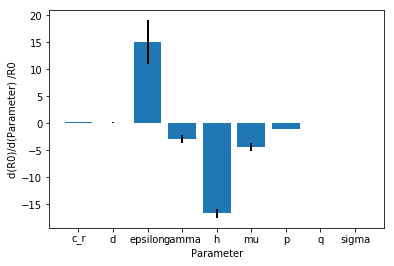

In [84]:

plot_value_ranges(c1)
plot.ylabel("d(R0)/d(Parameter) /R0")


Text(0,0.5,'d(R0)/d(Parameter) /R0')

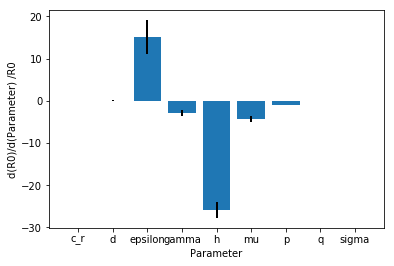

In [85]:

plot_value_ranges(a1)
plot.ylabel("d(R0)/d(Parameter) /R0")


Text(0,0.5,'d(R0)/d(Parameter) /R0')

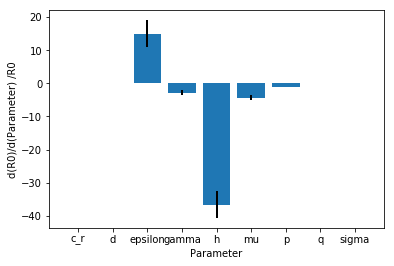

In [86]:

plot_value_ranges(b1)
plot.ylabel("d(R0)/d(Parameter) /R0")


Text(0,0.5,'Importance of Parameter')

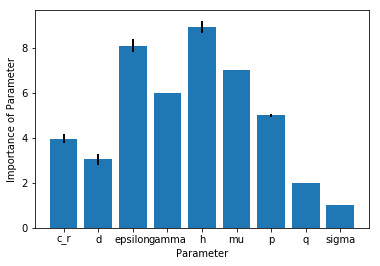

In [87]:

plot_value_ranges(c2)
plot.ylabel("Importance of Parameter")


Text(0,0.5,'Importance of Parameter')

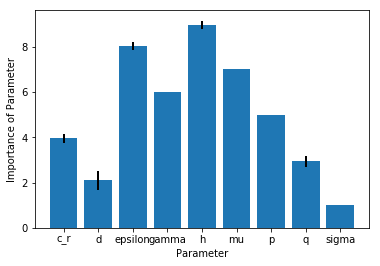

In [88]:

plot_value_ranges(a2)
plot.ylabel("Importance of Parameter")


Text(0,0.5,'Importance of Parameter')

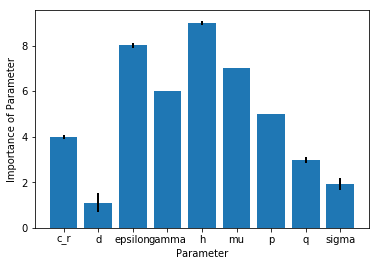

In [89]:

plot_value_ranges(b2)
plot.ylabel("Importance of Parameter")


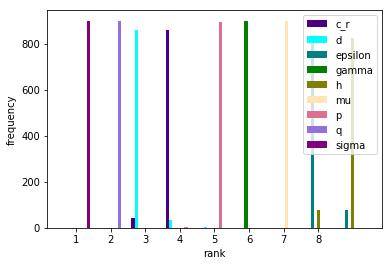

In [90]:
plot_hist(c2)

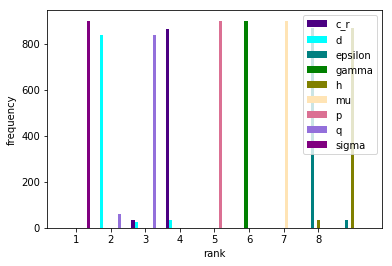

In [91]:
plot_hist(a2)

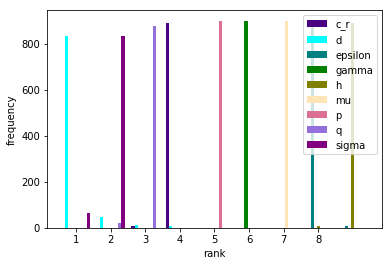

In [92]:
plot_hist(b2)

- neither cr nor q matter very much in terms of their partial differential over R0.
- but changing their value changes the order other variables-specificallly changing whether the variables are for medium, low or high temp changes the order of gamma/epsilon and q/d/cr. this is when peak of contact is at high temperatures
- i.e the model is fairly robust to changes in cr and q. but in different climates, values of other variables vary in importance.
- overall most important variables are epsilon and h followed by mu then gamma
- sigma is almost always the least important (q,d and cr are also low in the rankings)

In [15]:
#def plots(min,med,max):

#a=varying_parameters(parms_min,parms_median,parms_max,R0,abs_req=False)
# 
#    
#fig, (ax1,ax2,ax3) = plot.subplots(3)
#value_dics=[i[2] for i in a] #just values 
#parameters=[i for i in value_dics[0]] # just parameters
#parameters.sort()
#just_values=[value_dics[l][k] for k in parameters for l in range(len(parameters*no_range))] #all possible values
##parameters=np.array(parameters)
#no_parameters=len(parameters)
#no_each_parameter=len(just_values)/no_parameters
#no_each_parameter=int(no_each_parameter)
#to_fill = np.reshape(just_values, (no_each_parameter,no_parameters),order="f")
#m=np.matrix(to_fill,dtype=np.float64)
#means=np.array(m.mean(1))
#errors=np.array(m.std(1))
#array_means=np.repeat(means,no_each_parameter)
#array_parameters=np.repeat(parameters, no_each_parameter)
#array_errors=np.repeat(a=errors,repeats=no_each_parameter)
#ax1.bar(x=parameters,height=means,yerr=errors)
#ax1.xlabel("Parameter")
#    #array_values=np.array(just_values) 
#    #array_parameters=np.repeat(parameters, no_each_parameter)
#a=varying_parameters_ranks(parms_min,parms_median,parms_max,R0) 
#value_dics=[i[2] for i in a] #just values 
#parameters=[i for i in value_dics[0]] # just parameters
#parameters.sort()
#just_values=[value_dics[l][k] for k in parameters for l in range(len(parameters*no_range))] #all possible values
##parameters=np.array(parameters)
#no_parameters=len(parameters)
#no_each_parameter=len(just_values)/no_parameters
#no_each_parameter=int(no_each_parameter)
#to_fill = np.reshape(just_values, (no_each_parameter,no_parameters),order="f")
#m=np.matrix(to_fill,dtype=np.float64)
#means=np.array(m.mean(1))
#errors=np.array(m.std(1))
#array_means=np.repeat(means,no_each_parameter)
#array_parameters=np.repeat(parameters, no_each_parameter)
#array_errors=np.repeat(a=errors,repeats=no_each_parameter)
#ax2.bar(x=array_parameters,height=array_means,yerr=array_errors)
#ax2.ylabel("Importance of Parameter")
#colours=["r","orange","yellow","g","c","b","indigo","m","brown"]
#bins_list=[1,2,3,4,5,6,7,8,9,10]
#ax3.hist(to_fill, bins=bins_list, histtype="bar", label=parameters,color=colours,align='left')
#ax3.legend(loc='upper right')
#ax3.xticks(np.arange(1,9, 1))
#ax3.xlabel('rank')
#ax3.ylabel('frequency')



In [16]:
#simple=d+h+p
#
#a=loop_diff_varying_parameters(parms_min={"d":0,"h":0,"p":0},parms_median={"d":0.5,"h":0.5,"p":0.5},parms_max={"d":1,"h":1,"p":1},equation=simple)
#a=varying_parameters(parms_min={"d":0,"h":0,"p":0},parms_median={"d":0.5,"h":0.5,"p":0.5},parms_max={"d":1,"h":1,"p":1},equation=simple)
#for variable in a:
#    for value in a[str(variable)]:
#        for parm in a[str(variable)][value]:
#            print(a[str(variable)][value][str(parm)])
#all values
#for variable in a:
    #make a varuible for each
 #   for value in a[str(variable)]:
 #       for parm in a[str(variable)][value]:
 #           print(a[str(variable)][value][str(parm)])
 #       print()
     #   for parm in a[str(variable)][value]:
      #      print(a[str(variable)][value][str(parm)])
#all values
#a1=[1,2,{"f":10,"g":11,"h":12}]
#b1=[4,5,{"f":13,"g":14,"h":15}]
#c1=[7,8,{"f":16,"g":17,"h":18}]
#a=[a1,b1,c1]
#argh={"f":100,"g":11,"h":12}
#argh={key: rank for rank, key in enumerate(sorted(argh, key=argh.get, reverse=False), 1)}
#argh={"f":100,"g":11,"h":12}
#argh={key: rank for rank, key in enumerate(sorted(argh, key=argh.get, reverse=True), 1)}
#argh

In [17]:
#equation=R0
#rank_list=[]
#parms_temp=parms_median
#for k in equation.free_symbols:
#    if k!=c_r:
#        if k!=q:
#            param_value_range=np.linspace(parms_min[str(k)],parms_max[str(k)],3)
#            for l in param_value_range:
#                parms_temp[str(k)]=l#
#                argh=loop_diff(parms_temp,equation,abs_req=True)
#                argh={key: rank for rank, key in enumerate(sorted(argh, key=argh.get, reverse=False), 1)}
#                rank_list.append([k,l,argh])
#rank_list


In [18]:
#value_dics=[i[2] for i in a1] #just values 
#parameters=[i for i in value_dics[0]] # just parameters
#parameters_short=parameters[:]
#parameters_short.remove("q")
#parameters_short.remove("c_r")#

#just_values=[value_dics[l][s] for s in parameters for l in range(len(parameters_short*no_range))] #all possible values#